In [42]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [43]:
tips = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')


## Let's look at the first few rows to understand the dataset

In [44]:
tips.head(34)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


## How many weekdays are present in the dataset

In [45]:
tips['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

## Let's look at the last 5 rows

In [46]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


## How many Dinners and lunches data are present in the dataset

In [47]:
tips.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

## Let's plot the Chart of these values

<AxesSubplot:>

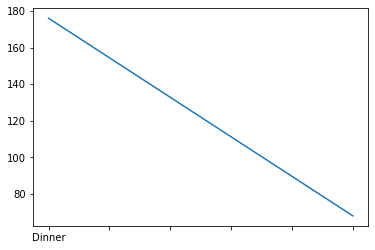

In [48]:
tips.time.value_counts().plot()

## This chart doesn't make sense, so let's change this to bar chart

<AxesSubplot:>

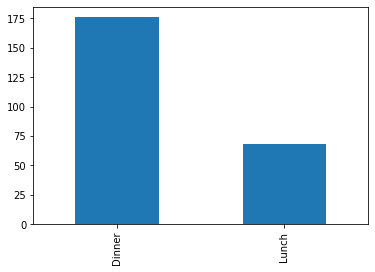

In [49]:
tips.time.value_counts().plot(kind='bar')

## What is the proportion of the dinner and lunches in %

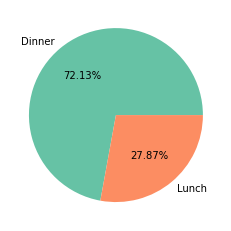

In [55]:
data = tips.time.value_counts(normalize=True)
color = sns.color_palette('Set2')
labels = ['Dinner', 'Lunch']
plt.pie(data, labels=labels, colors=color, autopct= '%.2f%%')
plt.show()

## When does people pay more tips i.e. during lunch or dinner


In [10]:
tips.groupby(['time'])['tip'].mean()

time
Dinner    3.102670
Lunch     2.728088
Name: tip, dtype: float64

## Let's plot these values

<AxesSubplot:xlabel='time'>

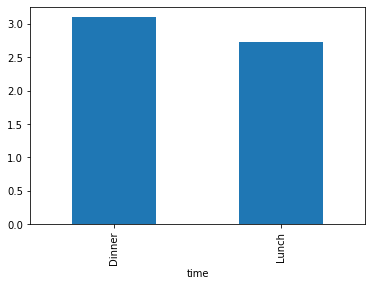

In [11]:
tips.groupby(['time'])['tip'].mean().plot(kind='bar')

## Similarly we can  find for average tips it is different for

##  1. Smoke / None smoke
##  2. Sex
##  3. Day 
##  4 size

## Let's create a cross table  for smoker and tips for average tips

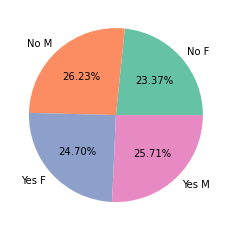

In [61]:
data = tips.groupby(['smoker','sex'])['tip'].mean()#  .plot(kind='bar')
data
color = sns.color_palette('Set2')
labels = ['No F', 'No M', 'Yes F', 'Yes M']
plt.pie(data, labels=labels, colors=color, autopct= '%.2f%%')
plt.show()

## Let's put it more like a pivot structure

In [13]:
tips.groupby(['smoker','sex'])['tip'].mean().unstack()

sex,Female,Male
smoker,,
No,2.773519,3.113402
Yes,2.931515,3.051167


## Similarly a cross table can be created for all the other variables like smoker, day and size etc. to find insight

## Now let's create a new column to find out the % of the tip compare to the total bill

In [14]:
tips['tip_pct'] = tips.tip / tips.total_bill

   ## Let's look at the values of newly created column

In [15]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


## Let's visualize the relationship between total bill and tips

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

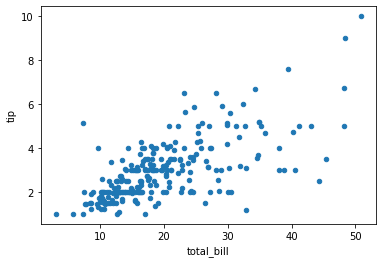

In [16]:
tips.plot.scatter(x='total_bill', y = 'tip')

## Visualizing this time using sns library

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

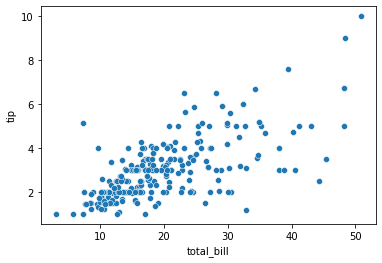

In [17]:
sns.scatterplot(x='total_bill', y = 'tip', data=tips)

## Let's add the effect of column sex to understand the data better

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

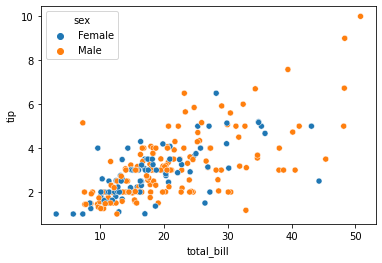

In [18]:
sns.scatterplot(x='total_bill', y = 'tip', data=tips, hue='sex')

## Similarly let's see the Visualization by time 

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

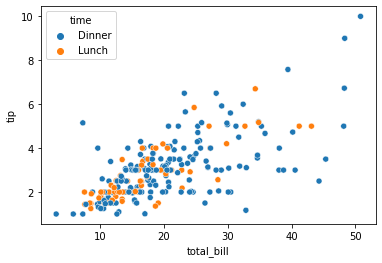

In [19]:
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='time')

## Creating bifurcation of time on the chart above based on column sex

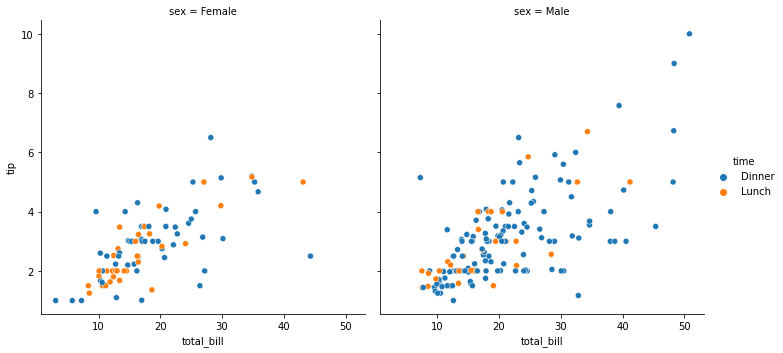

In [20]:
sns.relplot(
    x='total_bill', y='tip', data=tips, col='sex', hue='time'
)

## Let's look at the distribution of total bill by time

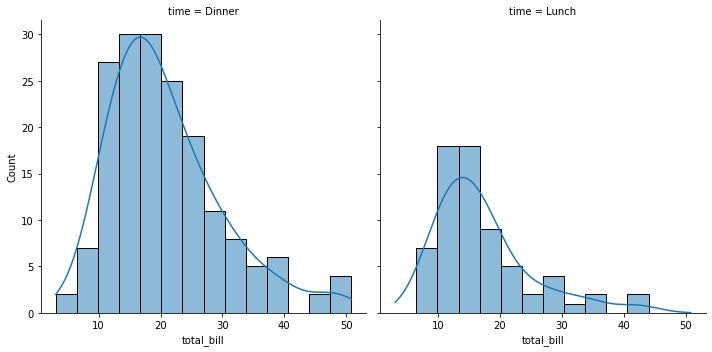

In [21]:
sns.displot(data=tips, x='total_bill', col='time', kde=True) #kde helps us line that crosses the chart

In [22]:
# Clearly people pay more total bill during dinner

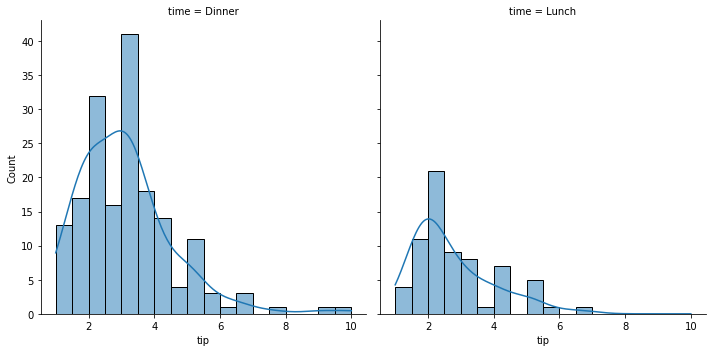

In [23]:
sns.displot(data=tips, x='tip', col='time', kde=True)

# Creating corellation and distribution for all the numeric variables by sex

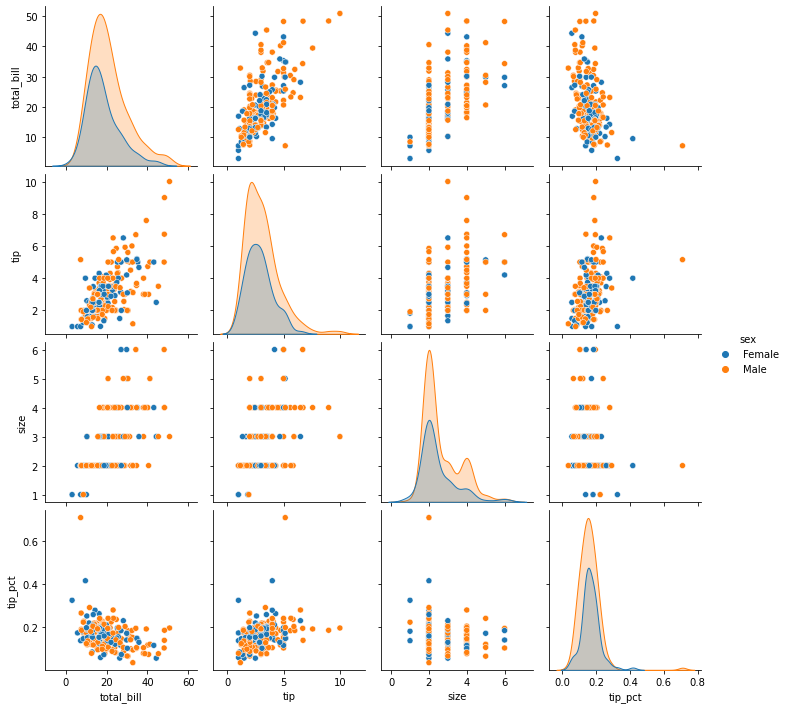

In [25]:
sns.pairplot(data=tips, hue='sex')